# Show tables

In [329]:
import duckdb
import os
from pathlib import Path
from typing import List
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Connexion à la DB / Import des Data


In [354]:
# Store database at project root
DB_NAME = Path("/home/c-enjalbert/Documents/EPSI/MSPR/bloc_2/amazing/amazing.duckdb") 
# Go up one level from current directory to get to project root
data_folder = Path("..") / "data"
# For absolute certainty, you could use the absolute path
# data_folder = Path("/home/c-enjalbert/Documents/EPSI/MSPR/bloc_2/amazing/data")
con = duckdb.connect(str(DB_NAME))
con.close()

In [331]:
# 2. Query to list all tables in the database
# DuckDB specific way to list tables
tables_info = con.sql("""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'main'
    ORDER BY table_name
""").df()

print(f"Found {len(tables_info)} tables in the database:\n")

if len(tables_info) > 0:
    for i, table_name in enumerate(tables_info['table_name']):
        print(f"{i+1}. {table_name}")
else:
    print("No tables found in the database.")

Found 2 tables in the database:

1. all_events
2. loaded_files


In [332]:
# 5. Alternative way to show all tables
print("List of all tables using DuckDB's connections.tables():")
con.sql("SHOW TABLES").show()

List of all tables using DuckDB's connections.tables():
┌──────────────┐
│     name     │
│   varchar    │
├──────────────┤
│ all_events   │
│ loaded_files │
└──────────────┘



In [333]:
# Examine the all_events table
print("First 10 rows of all_events table:")
all_events_data = con.sql("""
    SELECT * FROM all_events LIMIT 10
""")
all_events_data.show()

# Show count of records in all_events
record_count = con.sql("""
    SELECT COUNT(*) as total_events FROM all_events
""")
record_count.show()

# Examine the loaded_files table
print("\nContents of loaded_files table:")
loaded_files_data = con.sql("""
    SELECT * FROM loaded_files
""")
loaded_files_data.show()


First 10 rows of all_events table:
┌─────────────────────┬────────────┬────────────┬─────────────────────┬─────────────────────────────────────┬──────────┬─────────┬───────────┬──────────────────────────────────────┐
│     event_time      │ event_type │ product_id │     category_id     │            category_code            │  brand   │  price  │  user_id  │             user_session             │
│      timestamp      │  varchar   │  varchar   │       varchar       │               varchar               │ varchar  │ double  │  varchar  │               varchar                │
├─────────────────────┼────────────┼────────────┼─────────────────────┼─────────────────────────────────────┼──────────┼─────────┼───────────┼──────────────────────────────────────┤
│ 2019-10-01 00:00:00 │ view       │ 44600062   │ 2103807459595387724 │ NULL                                │ shiseido │   35.79 │ 541312140 │ 72d76fde-8bb3-4e00-8c23-a032dfed738c │
│ 2019-10-01 00:00:00 │ view       │ 3900821    │ 20530

### Save Tables as DataFrame

In [334]:
# Get event counts by event_type
print("Event counts by type:")
all_events = con.sql("""
    SELECT 
    *
    FROM all_events
    LIMIT 20000
""")
all_events.show()



Event counts by type:
┌─────────────────────┬────────────┬────────────┬─────────────────────┬─────────────────────────────────────┬──────────┬─────────┬───────────┬──────────────────────────────────────┐
│     event_time      │ event_type │ product_id │     category_id     │            category_code            │  brand   │  price  │  user_id  │             user_session             │
│      timestamp      │  varchar   │  varchar   │       varchar       │               varchar               │ varchar  │ double  │  varchar  │               varchar                │
├─────────────────────┼────────────┼────────────┼─────────────────────┼─────────────────────────────────────┼──────────┼─────────┼───────────┼──────────────────────────────────────┤
│ 2019-10-01 00:00:00 │ view       │ 44600062   │ 2103807459595387724 │ NULL                                │ shiseido │   35.79 │ 541312140 │ 72d76fde-8bb3-4e00-8c23-a032dfed738c │
│ 2019-10-01 00:00:00 │ view       │ 3900821    │ 205301355232677090

## Analyse de la Table events_counts

In [335]:
all_events_df = pd.DataFrame(all_events.df())
all_events_df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
event_time,20000,NaN,NaN,NaN,2019-10-01 02:29:27.043549,2019-10-01 00:00:00,2019-10-01 02:28:14.750000,2019-10-01 02:37:18,2019-10-01 02:46:00,2019-10-01 02:54:01,NaN
event_type,20000,3,view,19548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,20000,7178,1004856,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,20000,443,2053013555631882655,5387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_code,13412,115,electronics.smartphone,5387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,17185,922,samsung,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,20000.0,NaN,NaN,NaN,289.381401,0.0,60.23,154.42,359.08,2574.07,368.18694
user_id,20000,5012,531063605,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_session,20000,5669,f85114d0-6167-4c8b-88f8-0cd1cfc2c10c,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse des features

- **event_time**
TimeSeries -> Histogramme pour voir les anomalies

- **event_type**
Variable catégorielle avec 3 modalités distinctes: "view" (consultation), "cart" (ajout au panier) et "purchase" (achat). "View" est largement prédominant avec 1973/2000 occurrences (~98.65%).

- **product_id**
Identifiant unique des produits avec 1068 valeurs distinctes dans l'échantillon. Le produit le plus populaire (ID 1004767) apparaît 38 fois. 

- **category_id**
Identifiant numérique des catégories avec 209 valeurs distinctes. La catégorie dominante (ID 2053013555631882655) représente 617 occurrences (30.85%).

- **category_code**
Classification hiérarchique des produits avec 70 codes distincts. "electronics.smartphone" domine avec 617 occurrences, confirmant l'importance de cette catégorie. À noter que 33.75% des données sont manquantes, ce qui nécessitera un traitement approprié (imputation ou création d'une catégorie "inconnue"). 

- **brand**
Marque des produits avec 271 valeurs distinctes. Samsung est la marque la plus représentée (286 occurrences, 16.39% des données valides). 12.75% des valeurs sont manquantes, nécessitant une stratégie d'imputation. 

- **user_id**
Identifiant unique des utilisateurs avec 885 valeurs distinctes. L'utilisateur le plus actif (ID 513840435) a généré 24 événements. La distribution suggère que la plupart des utilisateurs n'ont généré que peu d'événements dans l'échantillon, ce qui est typique des données de comportement en ligne.

- **user_session**
Identifiant de session avec 943 valeurs distinctes. La session la plus active comporte également 24 événements. Le ratio sessions/utilisateurs (943/885 ≈ 1.07) indique que la plupart des utilisateurs n'ont qu'une seule session dans l'échantillon.

In [336]:
all_events_df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08,view,17300353,2053013553853497655,None,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08,view,31500053,2053013558031024687,None,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [337]:
all_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_time     20000 non-null  datetime64[us]
 1   event_type     20000 non-null  object        
 2   product_id     20000 non-null  object        
 3   category_id    20000 non-null  object        
 4   category_code  13412 non-null  object        
 5   brand          17185 non-null  object        
 6   price          20000 non-null  float64       
 7   user_id        20000 non-null  object        
 8   user_session   20000 non-null  object        
dtypes: datetime64[us](1), float64(1), object(7)
memory usage: 1.4+ MB


In [338]:
all_events_df.shape

(20000, 9)

In [339]:
all_events_df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

### Analyse Feature : event-time

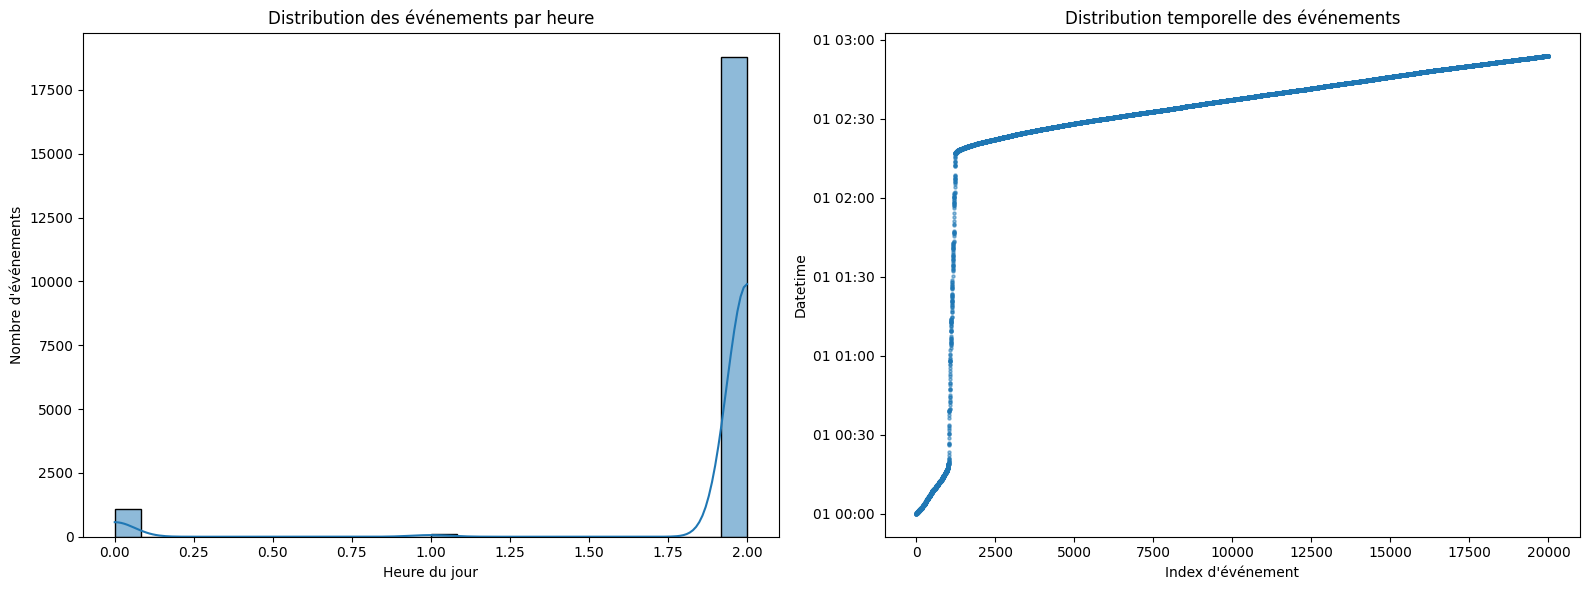

In [340]:
# Convert event_time to datetime if it's not already
all_events_df['event_time'] = pd.to_datetime(all_events_df['event_time'])

# Extract hour of day for analysis
all_events_df['hour'] = all_events_df['event_time'].dt.hour
all_events_df['minute'] = all_events_df['event_time'].dt.minute

# Plot the distribution of events over time
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(all_events_df['hour'], bins=24, kde=True)
plt.title('Distribution des événements par heure')
plt.xlabel('Heure du jour')
plt.ylabel('Nombre d\'événements')

plt.subplot(1, 2, 2)
# Create a scatter plot of events over the timeline
plt.scatter(range(len(all_events_df)), 
            all_events_df['event_time'], 
            alpha=0.5, s=5)
plt.title('Distribution temporelle des événements')
plt.xlabel('Index d\'événement')
plt.ylabel('Datetime')
plt.tight_layout()

### Analyse Feature : event-type

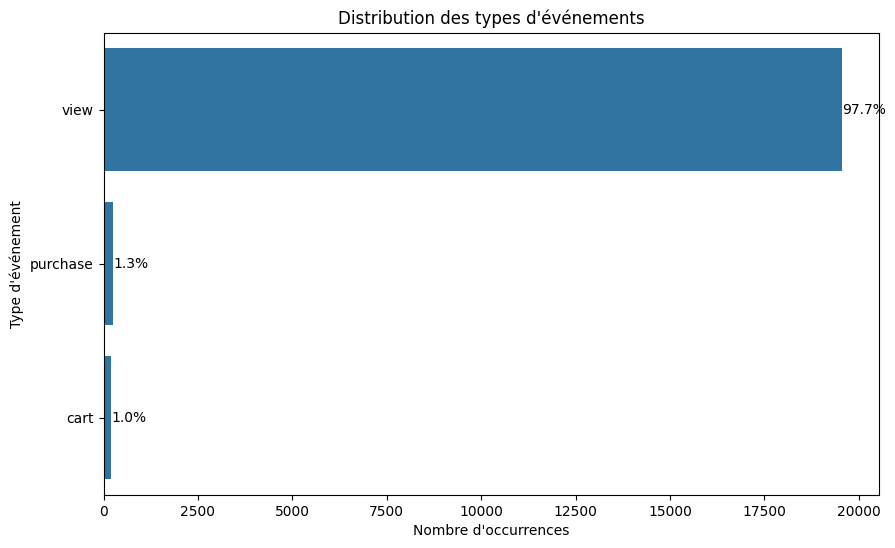

In [341]:
# Plot the distribution of event types
plt.figure(figsize=(10, 6))
sns.countplot(y='event_type', data=all_events_df, order=all_events_df['event_type'].value_counts().index)
plt.title('Distribution des types d\'événements')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Type d\'événement')

# Display percentages
counts = all_events_df['event_type'].value_counts()
total = len(all_events_df)
for i, count in enumerate(counts):
    percentage = count / total * 100
    plt.text(count + 10, i, f'{percentage:.1f}%', va='center')

In [342]:
all_events_df['event_type'].value_counts()

event_type
view        19548
purchase      258
cart          194
Name: count, dtype: int64

### Analyse Feature : category_code & product_id

Text(0, 0.5, 'Catégorie')

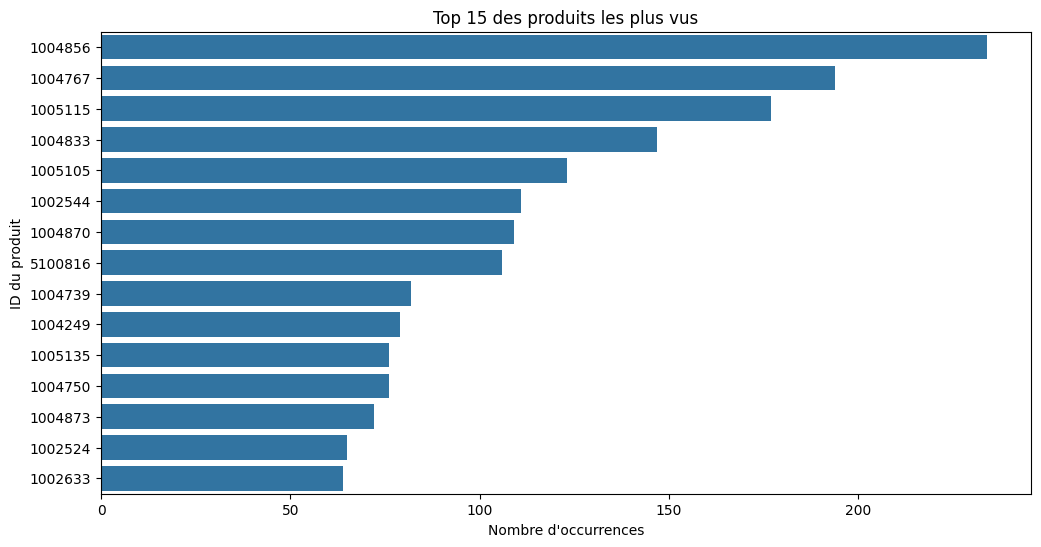

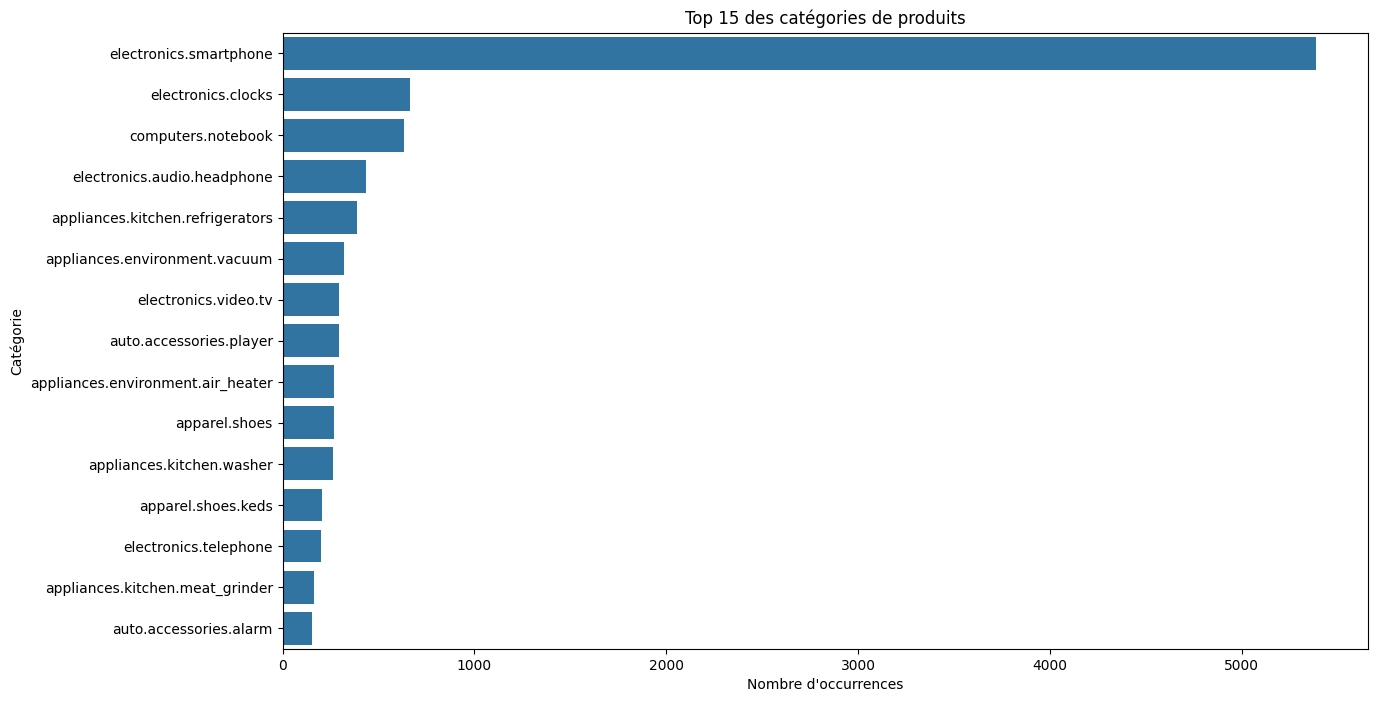

In [343]:
# Plot the top 15 most common products
plt.figure(figsize=(12, 6))
top_products = all_events_df['product_id'].value_counts().head(15)
sns.barplot(x=top_products.values, y=top_products.index.astype(str))
plt.title('Top 15 des produits les plus vus')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('ID du produit')

# Plot the distribution of categories
plt.figure(figsize=(14, 8))
top_categories = all_events_df['category_code'].value_counts().head(15)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 15 des catégories de produits')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Catégorie')

In [344]:
len(all_events_df["category_code"].values)

20000

### Analyse Feature: brand

Text(0.7, 0.95, 'Valeurs manquantes: 14.1%')

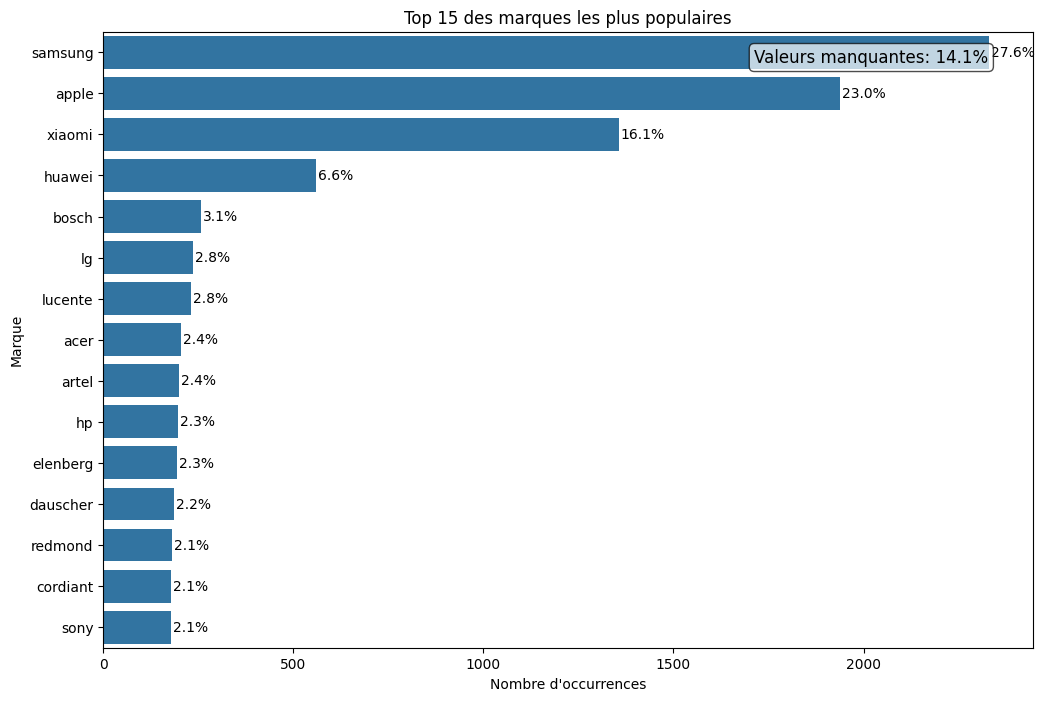

In [345]:
# Plot the top brands
plt.figure(figsize=(12, 8))
top_brands = all_events_df['brand'].value_counts().head(15)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 15 des marques les plus populaires')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Marque')

# Calculate percentages
total_brands = top_brands.sum()
percentages = (top_brands / total_brands * 100).round(1)

# Add percentage labels to the bars
for i, (count, percentage) in enumerate(zip(top_brands.values, percentages)):
    plt.text(count + 5, i, f'{percentage}%', va='center')

# Calculate and display missing values for brand
missing_brand_pct = all_events_df['brand'].isna().mean() * 100
plt.annotate(f'Valeurs manquantes: {missing_brand_pct:.1f}%', 
             xy=(0.7, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.7))

In [346]:
top_brands.index

Index(['samsung', 'apple', 'xiaomi', 'huawei', 'bosch', 'lg', 'lucente',
       'acer', 'artel', 'hp', 'elenberg', 'dauscher', 'redmond', 'cordiant',
       'sony'],
      dtype='object', name='brand')

### Analyse Feature : price

Text(0, 0.5, 'Prix')

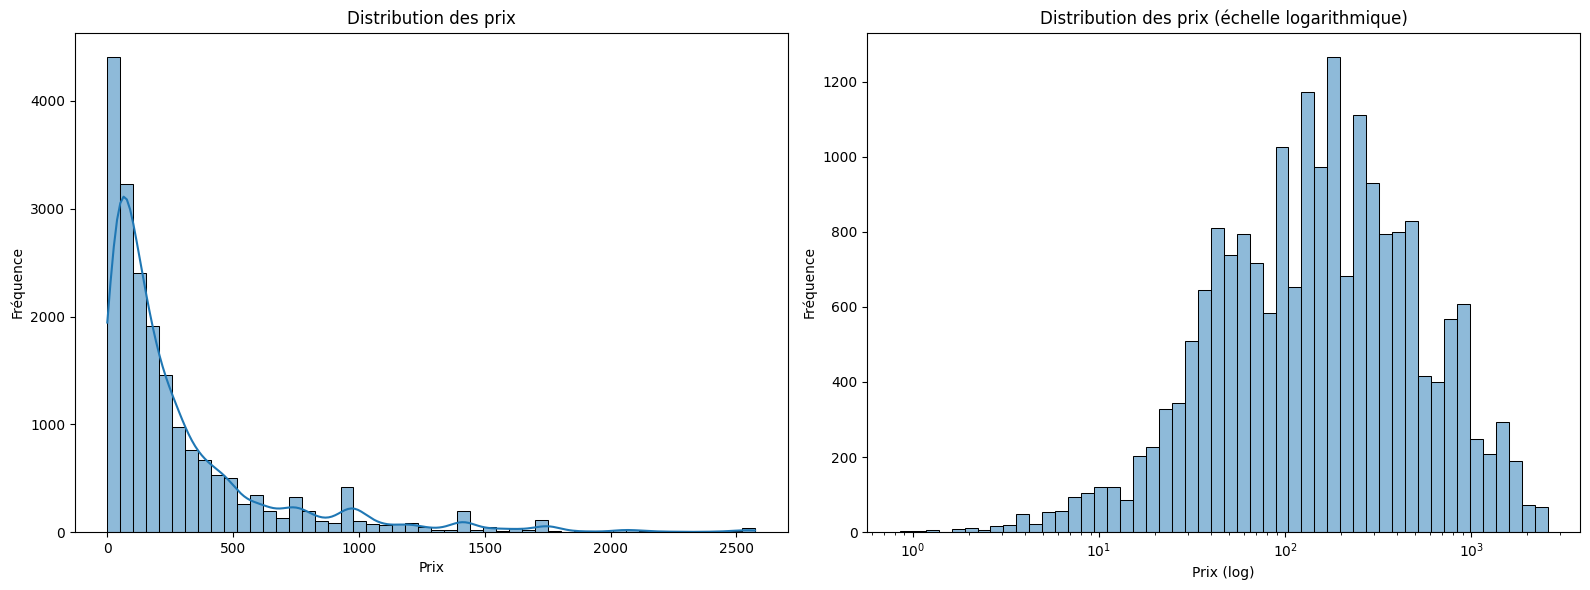

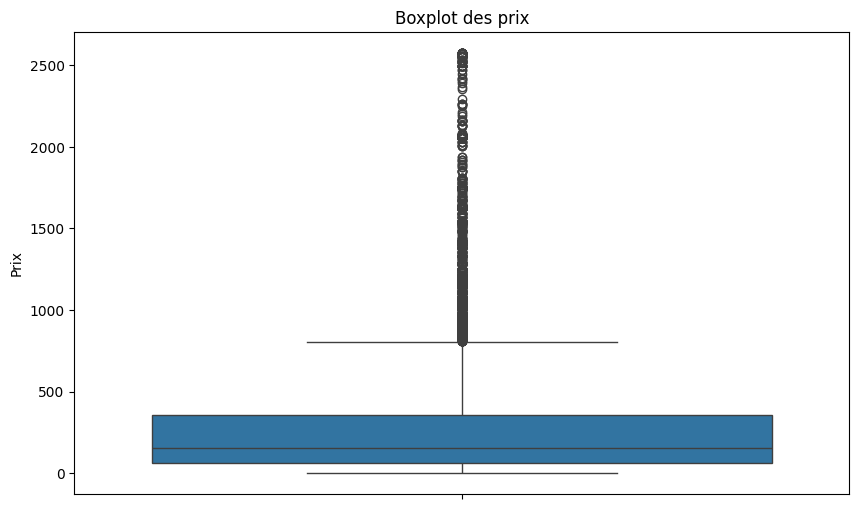

In [347]:
# Plot the distribution of prices
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(all_events_df['price'], bins=50, kde=True)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
# Log scale to better visualize the distribution
sns.histplot(all_events_df['price'], bins=50, kde=True, log_scale=True)
plt.title('Distribution des prix (échelle logarithmique)')
plt.xlabel('Prix (log)')
plt.ylabel('Fréquence')
plt.tight_layout()

# Statistics on price
plt.figure(figsize=(10, 6))
sns.boxplot(y=all_events_df['price'])
plt.title('Boxplot des prix')
plt.ylabel('Prix')

In [348]:
# Analyser la distribution des prix
price_stats = all_events_df['price'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Statistiques des prix:")
print(price_stats)

# Calculer le pourcentage de produits en dessous de 400€
below_400 = (all_events_df['price'] <= 400).mean() * 100
print(f"\nPourcentage de produits avec un prix inférieur ou égal à 400€: {below_400:.1f}%")

# Trouver le prix maximum
max_price = all_events_df['price'].max()
print(f"Prix maximum observé: {max_price:.2f}€")

# Répartition des prix par tranches
price_ranges = [0, 100, 200, 400, 800, 1500, 2500]
price_counts = pd.cut(all_events_df['price'], bins=price_ranges).value_counts().sort_index()
price_percentages = price_counts / len(all_events_df) * 100

Statistiques des prix:
count    20000.000000
mean       289.381401
std        368.186940
min          0.000000
25%         60.230000
50%        154.420000
75%        359.080000
90%        745.350000
95%       1029.370000
99%       1747.790000
max       2574.070000
Name: price, dtype: float64

Pourcentage de produits avec un prix inférieur ou égal à 400€: 78.5%
Prix maximum observé: 2574.07€


### Interprétation du Boxplot des prix

Ce boxplot (ou boîte à moustaches) représente la distribution des prix des produits dans le jeu de données. Voici une analyse détaillée:

**Tendance centrale et dispersion**
- **Médiane**: La ligne horizontale au milieu de la boîte (environ 200€) indique que la moitié des produits coûte moins de ce montant
- **Quartiles**: La boîte bleue s'étend du premier quartile (Q1 ≈ 50€) au troisième quartile (Q3 ≈ 400€), contenant ainsi 50% des données
- **Écart interquartile (IQR)**: L'étendue de la boîte (≈ 350€) montre une dispersion relativement importante des prix dans la partie centrale de la distribution

**Distribution et asymétrie**
- **Distribution asymétrique**: La distribution est fortement asymétrique vers la droite (asymétrie positive), avec une longue queue vers les valeurs élevées
- **Concentration**: La majorité des produits se situe dans une gamme de prix relativement basse (moins de 400€)

**Valeurs extrêmes**
- **Points aberrants**: De nombreux points au-dessus de la moustache supérieure représentent des produits significativement plus chers que la tendance générale
- **Prix maximum**: Les produits les plus chers atteignent environ 2500€
- **Moustache supérieure**: S'étend jusqu'à environ 900€, suggérant que les produits au-delà de ce seuil sont considérés comme statistiquement atypiques

**Implications commerciales**
- Le catalogue contient principalement des produits à prix modéré mais inclut également une gamme importante de produits premium
- La grande dispersion des prix suggère une stratégie commerciale diversifiée, couvrant différents segments de marché
- La présence de nombreux produits coûteux pourrait indiquer un positionnement significatif sur le segment haut de gamme, notamment pour les catégories comme l'électronique et les appareils électroménagers

Cette distribution des prix devrait être mise en perspective avec l'analyse des catégories de produits et des marques pour identifier quels segments spécifiques commandent les prix les plus élevés.

### Analyse Feature : user_id & user_session

Text(0, 0.5, "Nombre d'utilisateurs")

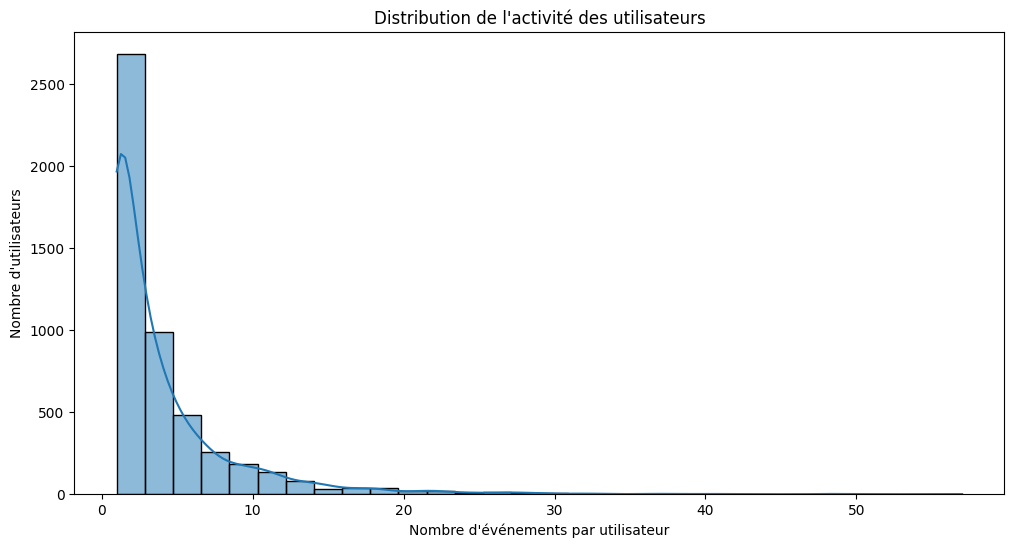

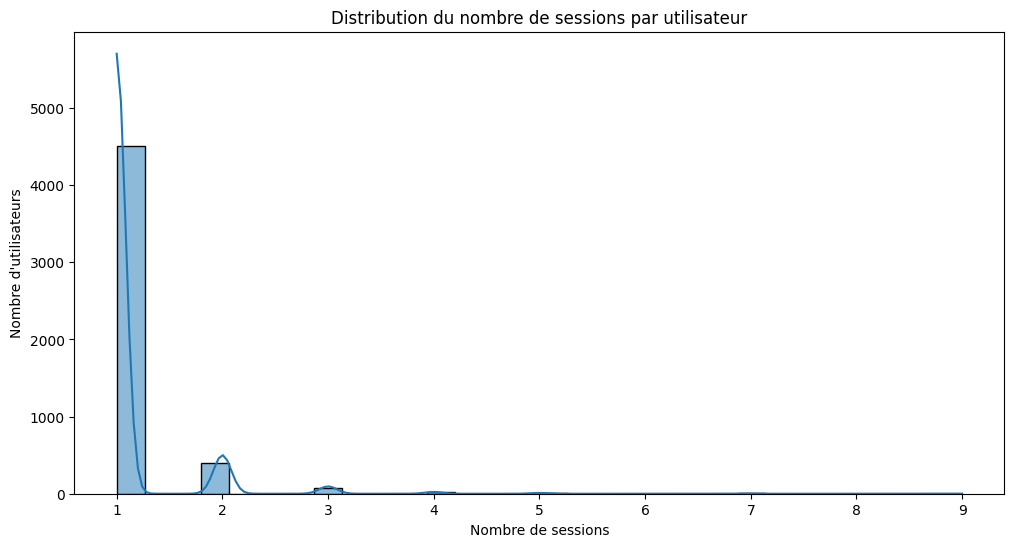

In [349]:
# Plot user activity distribution
plt.figure(figsize=(12, 6))
user_activity = all_events_df['user_id'].value_counts()
sns.histplot(user_activity, bins=30, kde=True)
plt.title('Distribution de l\'activité des utilisateurs')
plt.xlabel('Nombre d\'événements par utilisateur')
plt.ylabel('Nombre d\'utilisateurs')

# Sessions per user
plt.figure(figsize=(12, 6))
sessions_per_user = all_events_df.groupby('user_id')['user_session'].nunique()
sns.histplot(sessions_per_user, bins=30, kde=True)
plt.title('Distribution du nombre de sessions par utilisateur')
plt.xlabel('Nombre de sessions')
plt.ylabel('Nombre d\'utilisateurs')

###  Analyse Feature des Valeurs Manquantes

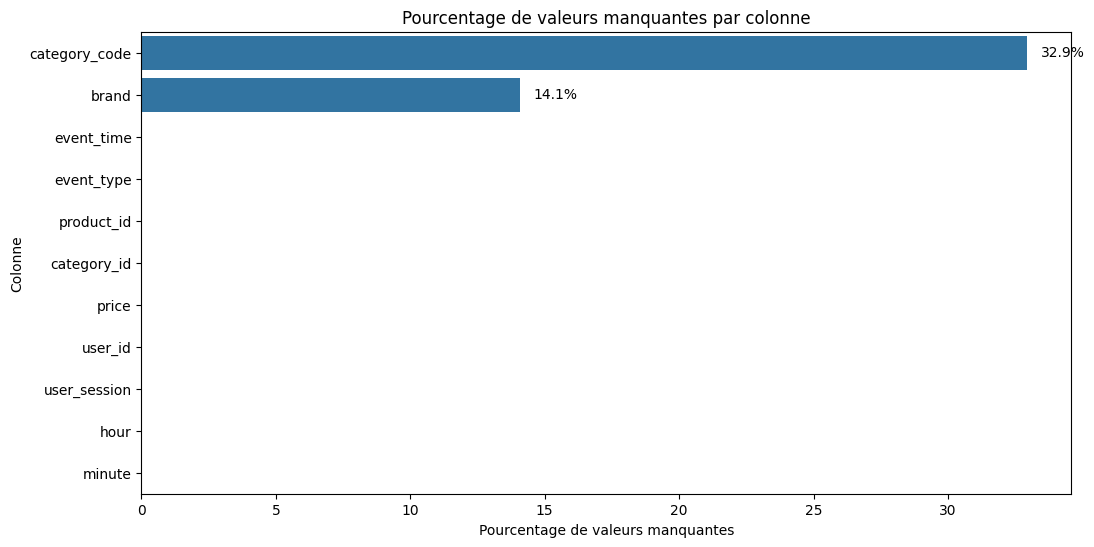

In [350]:
# Calculate percentage of missing values for each column
missing_data = all_events_df.isna().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.values, y=missing_data.index)
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xlabel('Pourcentage de valeurs manquantes')
plt.ylabel('Colonne')

# Add percentage labels
for i, percentage in enumerate(missing_data):
    if percentage > 0:
        plt.text(percentage + 0.5, i, f'{percentage:.1f}%', va='center')

### Corrélations et Relations

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'computers.notebook'),
  Text(1, 0, 'electronics.smartphone'),
  Text(2, 0, 'apparel.shoes.keds'),
  Text(3, 0, 'electronics.video.tv'),
  Text(4, 0, 'electronics.audio.headphone'),
  Text(5, 0, 'appliances.environment.air_heater'),
  Text(6, 0, 'apparel.shoes'),
  Text(7, 0, 'appliances.environment.vacuum'),
  Text(8, 0, 'appliances.kitchen.refrigerators'),
  Text(9, 0, 'appliances.kitchen.washer'),
  Text(10, 0, 'electronics.clocks'),
  Text(11, 0, 'appliances.kitchen.meat_grinder'),
  Text(12, 0, 'electronics.telephone'),
  Text(13, 0, 'auto.accessories.alarm'),
  Text(14, 0, 'auto.accessories.player')])

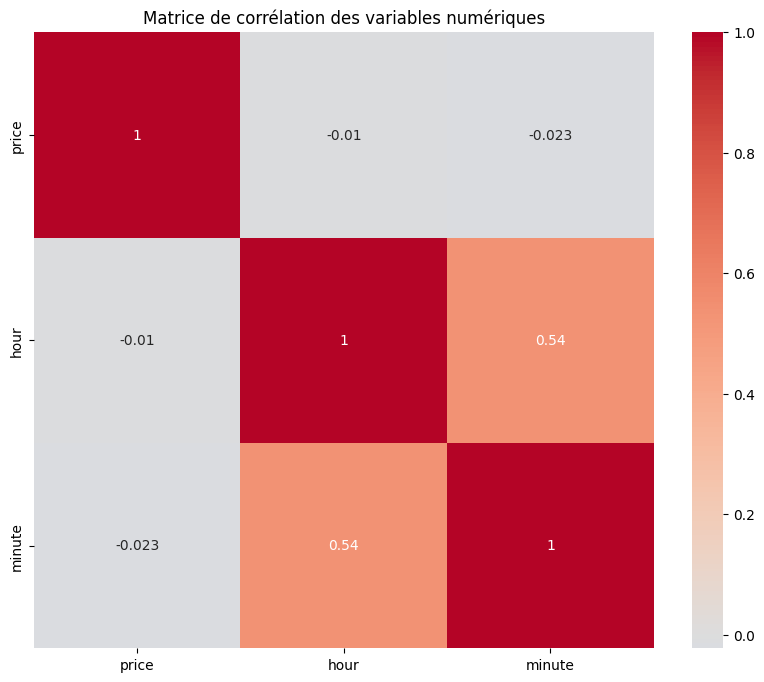

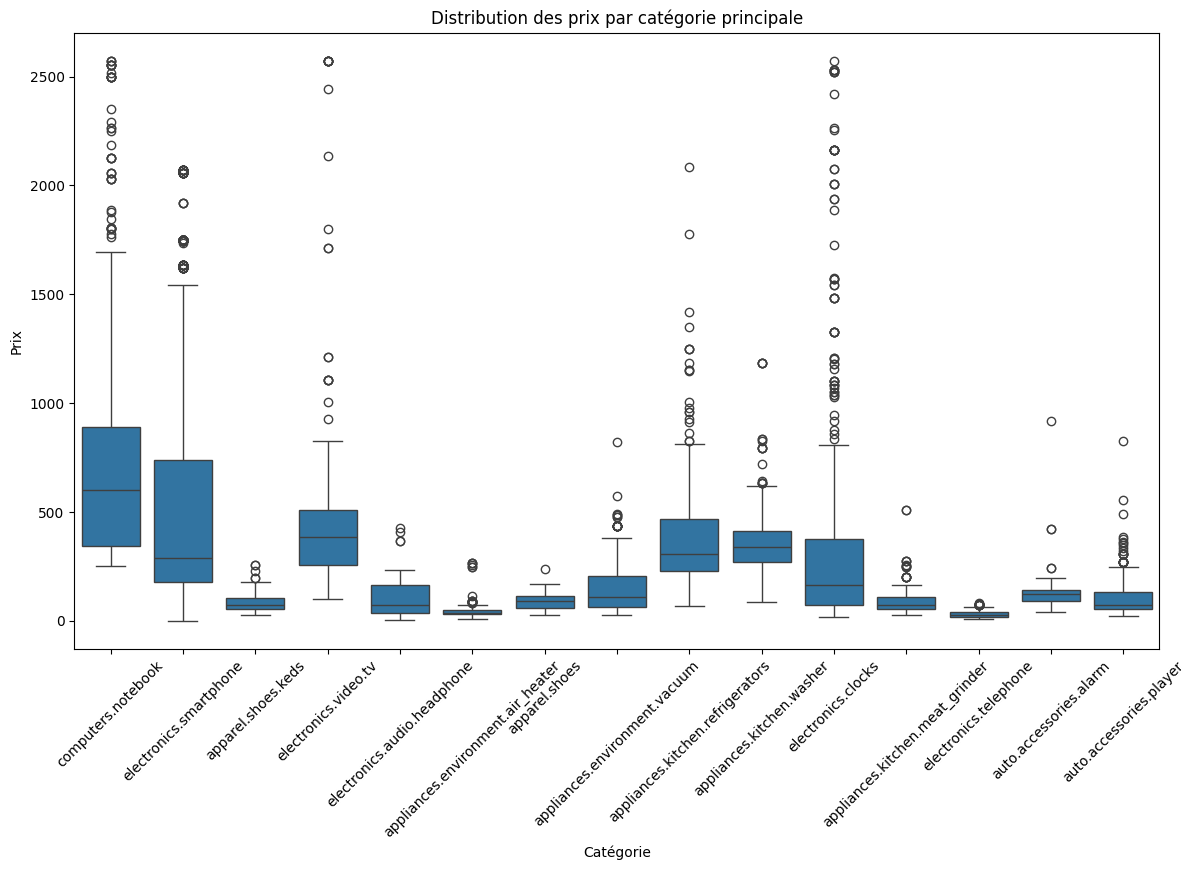

In [351]:
# Correlation between numerical columns
numeric_columns = all_events_df.select_dtypes(include=[np.number]).columns
correlation = all_events_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables numériques')

# Boxplot of prices by top categories
plt.figure(figsize=(14, 8))
top_5_categories = all_events_df['category_code'].value_counts().head(15).index
category_price_data = all_events_df[all_events_df['category_code'].isin(top_5_categories)]
sns.boxplot(x='category_code', y='price', data=category_price_data)
plt.title('Distribution des prix par catégorie principale')
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.xticks(rotation=45)

### Etude Corrélation entre le prix et la popularité des catégories de produits

/tmp/ipykernel_96155/3344999853.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_categories.values, y=top_categories.index,
/tmp/ipykernel_96155/3344999853.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='price', y='category_code', data=price_data,


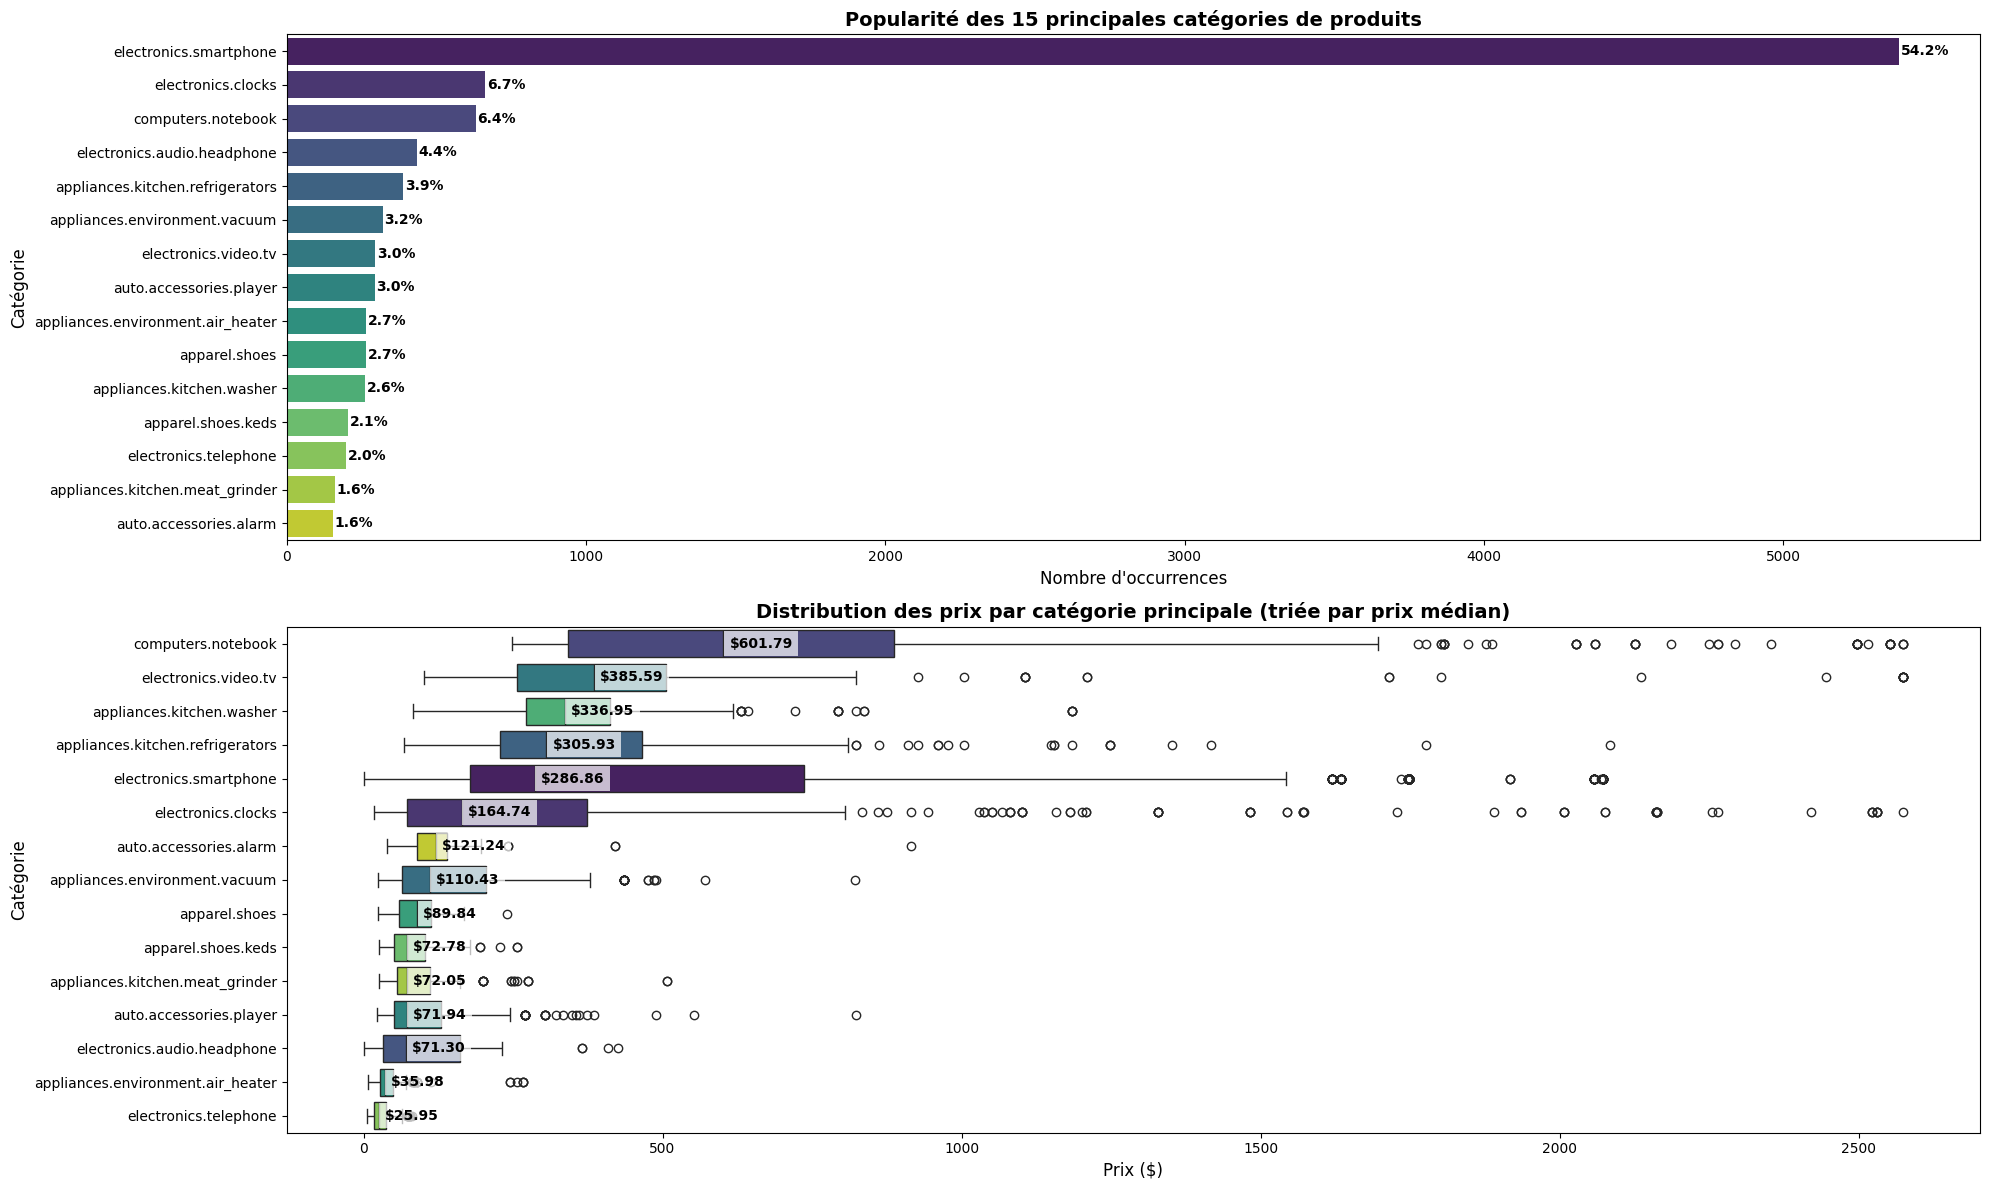

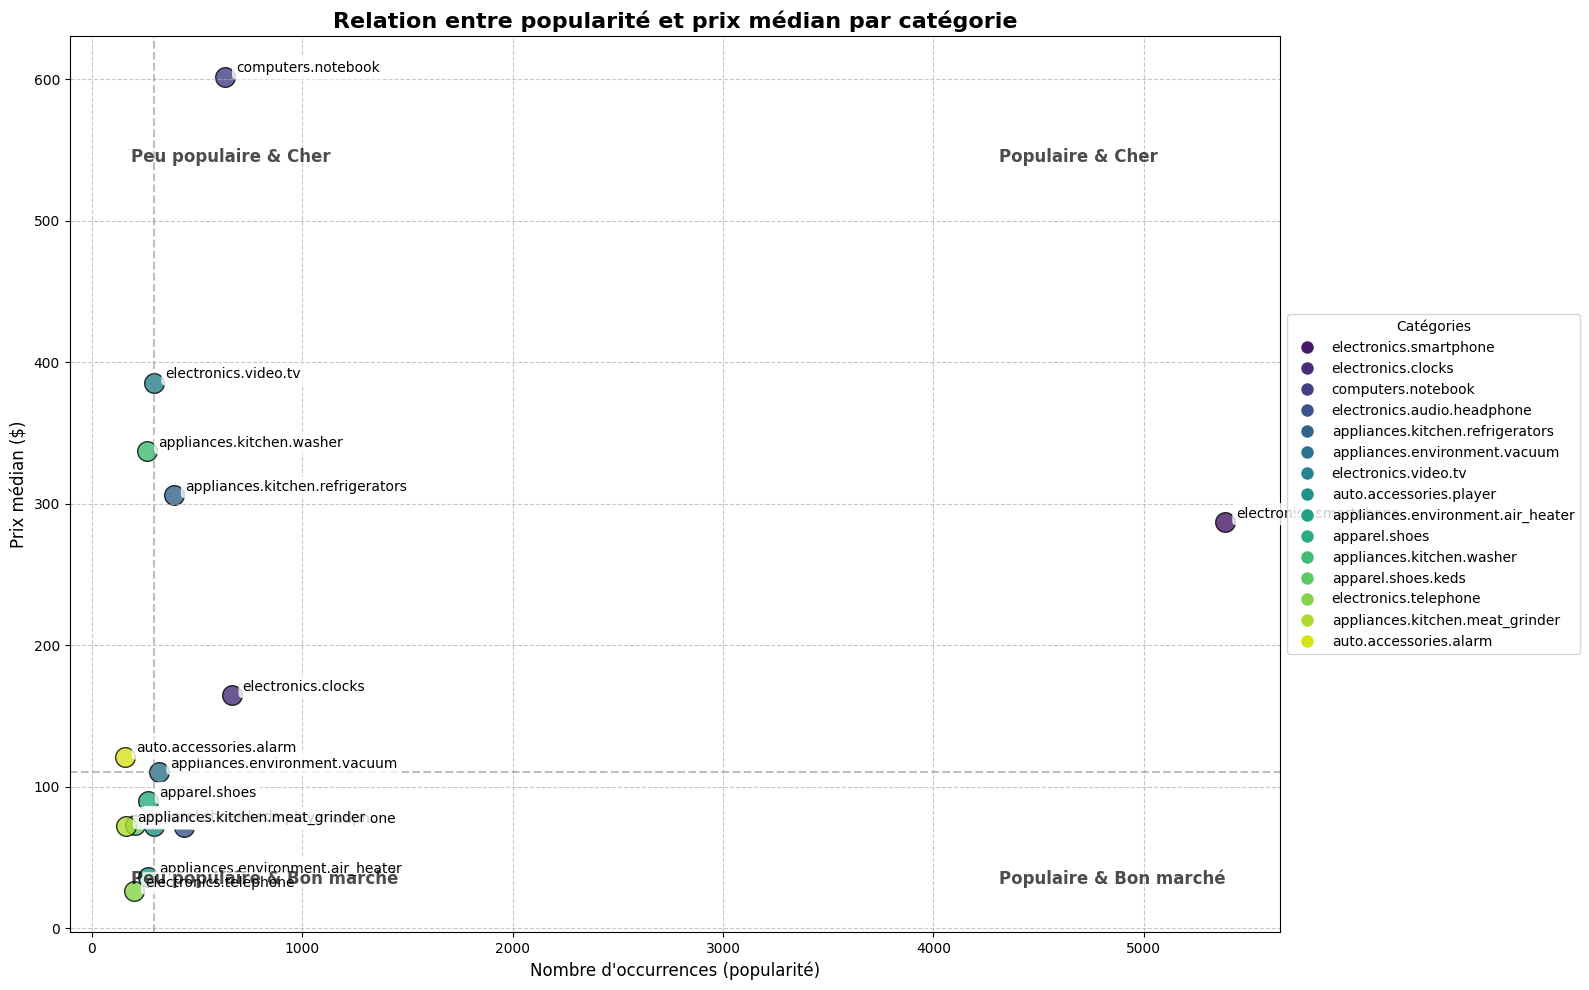

In [352]:
# Créer une figure avec deux sous-graphiques
plt.figure(figsize=(20, 12))

# Définir une palette de couleurs constante pour les catégories
top_categories = all_events_df['category_code'].value_counts().head(15)
n_categories = len(top_categories)
colors = sns.color_palette("viridis", n_categories)
category_color_map = dict(zip(top_categories.index, colors))

# 1. Graphique de popularité des catégories
plt.subplot(2, 1, 1)
bars = sns.barplot(x=top_categories.values, y=top_categories.index, 
                  palette=[category_color_map[cat] for cat in top_categories.index])
plt.title('Popularité des 15 principales catégories de produits', fontsize=14, fontweight='bold')
plt.xlabel('Nombre d\'occurrences', fontsize=12)
plt.ylabel('Catégorie', fontsize=12)

# Ajouter les pourcentages sur le graphique
total = top_categories.sum()
for i, count in enumerate(top_categories.values):
    percentage = count / total * 100
    plt.text(count + 5, i, f'{percentage:.1f}%', va='center', fontweight='bold')

# 2. Graphique de distribution des prix par catégorie (en dessous)
plt.subplot(2, 1, 2)
# Utiliser les mêmes 15 catégories principales pour la cohérence
top_15_categories = top_categories.index
price_data = all_events_df[all_events_df['category_code'].isin(top_15_categories)]
# Boxplot trié par prix médian pour faciliter la comparaison
median_prices = price_data.groupby('category_code')['price'].median().sort_values(ascending=False)
order = median_prices.index

# Créer une palette de couleurs qui maintient la cohérence avec le premier graphique
ordered_colors = [category_color_map[cat] for cat in order]

# Créer le boxplot avec les couleurs correspondantes
boxplot = sns.boxplot(x='price', y='category_code', data=price_data, 
                     order=order, palette=ordered_colors)
plt.title('Distribution des prix par catégorie principale (triée par prix médian)', 
         fontsize=14, fontweight='bold')
plt.xlabel('Prix ($)', fontsize=12)
plt.ylabel('Catégorie', fontsize=12)

# Afficher les prix médians à côté de chaque boxplot
for i, category in enumerate(order):
    median_price = median_prices[category]
    plt.text(median_price + 10, i, f'${median_price:.2f}', va='center', 
            fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.tight_layout()

# Pour une analyse plus complète, créons également un scatter plot pour voir la relation prix vs popularité
plt.figure(figsize=(16, 10))
category_stats = pd.DataFrame({
    'category': top_categories.index,
    'count': top_categories.values,
    'median_price': [price_data[price_data['category_code'] == cat]['price'].median() for cat in top_categories.index]
})

# Utiliser les mêmes couleurs pour chaque catégorie dans le scatter plot
for i, (cat, count, price) in enumerate(zip(category_stats['category'], 
                                          category_stats['count'], 
                                          category_stats['median_price'])):
    plt.scatter(count, price, s=200, alpha=0.8, color=category_color_map[cat], 
               edgecolor='black', linewidth=1)
    
    # Ajouter des annotations plus visibles avec fond blanc
    plt.annotate(cat, 
                xy=(count, price),
                xytext=(8, 3), 
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc='white', alpha=0.8, ec="none"))

plt.title('Relation entre popularité et prix médian par catégorie', fontsize=16, fontweight='bold')
plt.xlabel('Nombre d\'occurrences (popularité)', fontsize=12)
plt.ylabel('Prix médian ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajout d'un gradient de couleur de fond pour faciliter la lecture
plt.axhline(y=category_stats['median_price'].median(), color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=category_stats['count'].median(), color='gray', linestyle='--', alpha=0.5)

# Ajout de labels pour les quadrants
plt.annotate('Populaire & Bon marché', 
            xy=(category_stats['count'].max()*0.8, category_stats['median_price'].min()*1.2),
            fontsize=12, fontweight='bold', alpha=0.7)
plt.annotate('Populaire & Cher', 
            xy=(category_stats['count'].max()*0.8, category_stats['median_price'].max()*0.9),
            fontsize=12, fontweight='bold', alpha=0.7)
plt.annotate('Peu populaire & Bon marché', 
            xy=(category_stats['count'].min()*1.2, category_stats['median_price'].min()*1.2),
            fontsize=12, fontweight='bold', alpha=0.7)
plt.annotate('Peu populaire & Cher', 
            xy=(category_stats['count'].min()*1.2, category_stats['median_price'].max()*0.9),
            fontsize=12, fontweight='bold', alpha=0.7)

# Ajouter une légende explicite
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_color_map[cat], 
                     markersize=10, label=cat) for cat in top_categories.index]
plt.legend(handles=handles, title="Catégories", loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

### Conclusion Analyse Exploratoire all_events

- **event_type**
"View" est largement prédominant avec 1973/2000 occurrences (~98.65%) pour 19 occurences pour "Purchase" (~0,9%). Il faut chercher la présence de patterns dans les occurences d'achats à fin de repérer quels sont les features qui conditionne l'évènement de type "Purchase".

- **category_code**
Les Catégories les plus venues sont comprises entre 30 et 700 euros. Le top 10 des catégories les plus vendues : 

    - electronics.smartphone - 42%
    - electronics.clocks - 5.9%
    - electronics.audio.headphone - 3.7%
    - computers.notebook - 5.1%
    - appliances.environment.air_heater - 4.5%
    - appliances.kitchen.washer - 4.1%
    - computers.desktop - 2.9%
    - appliances.kitchen.refrigerators - 2.8%
    - apparel.shoes.keds - 2.5%
    - apparel.shoes - 2.1%

    Les achats catégorie parente "electronics" représente environ 50% des achats totaux.

- **brand**
Les 15 marques les plus vendues sur le site, Samsung et Apple dominent à eux seuls plus de la moitié des occurrences, ces deux marques représentent ensemble 53.3% du total des occurrences :

    - Samsung - 29.3%
    - Apple - 24.0%
    - Xiaomi - 11.3%
    - Huawei - 6.2%
    - LG - 3.9%
    - Lucente - 3.8%
    - Acer - 3.3%
    - Bosch - 2.9%
    - Oppo - 2.8%
    - Nokia - 2.4%
    - Elenberg - 2.3%
    - Cordiant - 2.0%
    - Lenovo - 1.9%
    - Oasis - 1.8%
    - HP - 1.6%


- **price**
75.2% des produits avec un prix inférieur ou égal à 400€.
Le prix maximum observé est de 2496.59€, tandis que le prix moyen des produits est de 313€.




In [ ]:
con.close()